In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as mplt
import numpy as np


In [34]:
#https://keras.io/api/datasets/
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [35]:
#train_x are images as 2D arrays of pixel values
train_x[0].shape

(28, 28)

In [36]:
#Sizes of datasets
len(train_x)

60000

In [37]:
len(test_x)

10000

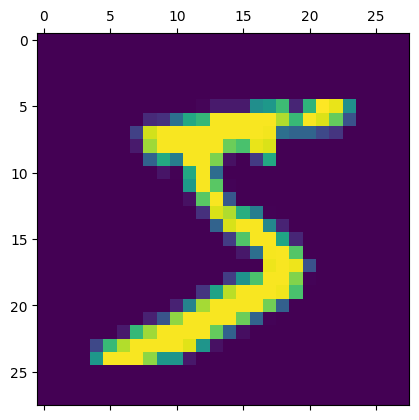

In [38]:
mplt.matshow(train_x[0])

In [39]:
train_y[0]

5

In [40]:
#scaling the dataset all pixels are between 0-255
train_x = train_x/ 255
test_x = test_x /255

In [41]:
#When create training or input data it almost always needs to be 1D
train_x_1D = train_x.reshape(len(train_x), 28*28)
test_x_1D = test_x.reshape(len(test_x), 28*28)

In [42]:
#Creating are model
NeuralNetwork = keras.Sequential([
    #dense every intail node is connect to all outputs nodes
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

NeuralNetwork.compile(
    #https://www.geeksforgeeks.org/optimizers-in-tensorflow/
                    optimizer='adaMax', 
    #https://keras.io/api/losses/
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
)
#training the model
NeuralNetwork.fit(train_x_1D, train_y, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6448 - accuracy: 0.8417
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3730 - accuracy: 0.8987
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3367 - accuracy: 0.9072
Epoch 4/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3190 - accuracy: 0.9115


In [43]:
#Testing on are test dataset
NeuralNetwork.evaluate(test_x_1D, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.9178


[0.299455851316452, 0.9178000092506409]

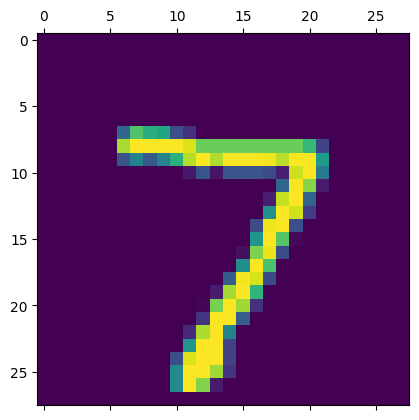

In [44]:
mplt.matshow(test_x[0])

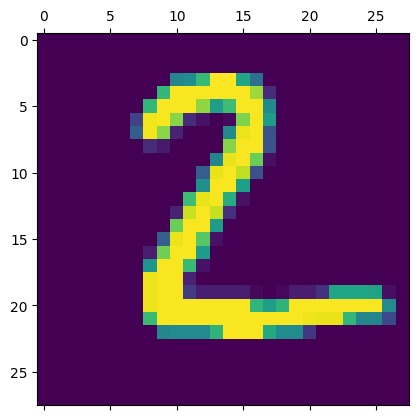

In [45]:
mplt.matshow(test_x[1])

In [46]:
predicted = NeuralNetwork.predict(test_x_1D)

313/313 [==============================] - 1s 3ms/step


In [47]:
#Prediction array for test[0]
predicted[0]

array([1.4908819e-01, 9.1607049e-05, 1.4137994e-01, 8.1116712e-01,
       2.2681288e-02, 8.1721395e-02, 2.1866488e-04, 9.9929446e-01,
       1.5253711e-01, 7.3704493e-01], dtype=float32)

In [48]:
np.argmax(predicted[0])

7

In [49]:
#Prediction array for test[1]
predicted[1]

array([4.8449749e-01, 6.7252023e-03, 9.9474376e-01, 5.3677458e-01,
       2.6080006e-06, 5.9707785e-01, 8.3095437e-01, 2.5050346e-07,
       2.6734978e-01, 1.8778393e-05], dtype=float32)

In [50]:
np.argmax(predicted[1])

2

In [51]:
num_predictions = []
for i in predicted:
    num_predictions.append(np.argmax(i))
num_predictions[:10]
    

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [52]:
num_predictions = [np.argmax(i) for i in predicted]
Graphic = tf.math.confusion_matrix(labels=test_y,predictions=num_predictions)
Graphic

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    2,    9,    1,    2,    0],
       [   0, 1109,    2,    2,    1,    3,    4,    1,   13,    0],
       [   8,    6,  917,   17,   12,    1,   13,   13,   40,    5],
       [   3,    1,   20,  922,    0,   20,    4,    9,   21,   10],
       [   2,    1,    4,    1,  916,    0,   11,    1,    8,   38],
       [   9,    4,    7,   42,   12,  750,   14,    8,   37,    9],
       [  13,    3,    6,    1,   11,   11,  910,    1,    2,    0],
       [   2,   11,   27,    6,    7,    0,    0,  936,    3,   36],
       [   6,    9,    9,   26,    9,   23,   13,   12,  852,   15],
       [  11,    7,    4,   12,   40,    7,    0,   19,    5,  904]])>

Text(95.72222222222221, 0.5, 'Actual Result')

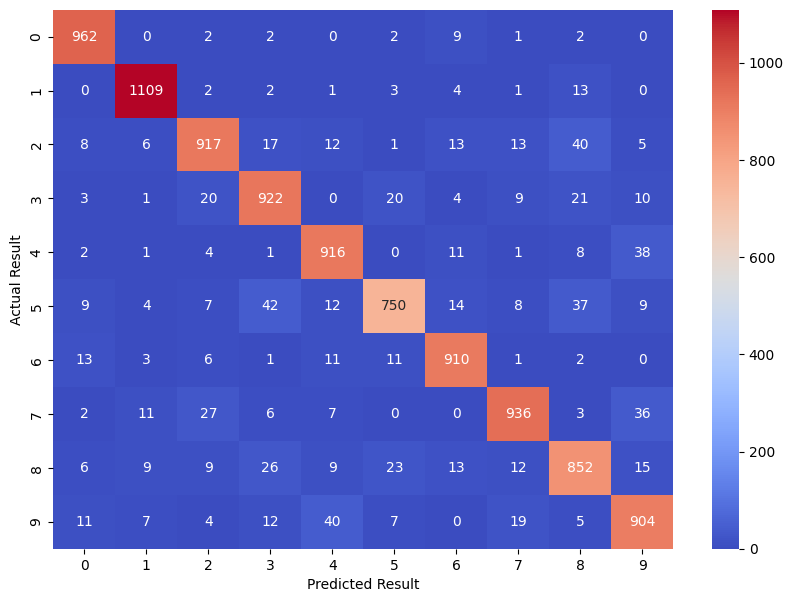

In [53]:
#Copied off this website https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
mplt.figure(figsize=(10,7))
sns.color_palette("bright", 10)
sns.heatmap(Graphic,annot=True, fmt="d", cmap="coolwarm")
mplt.xlabel('Predicted Result')
mplt.ylabel('Actual Result')